In [1]:
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
df = pd.read_csv('total_cases.csv')

In [3]:
df.shape

(112, 208)

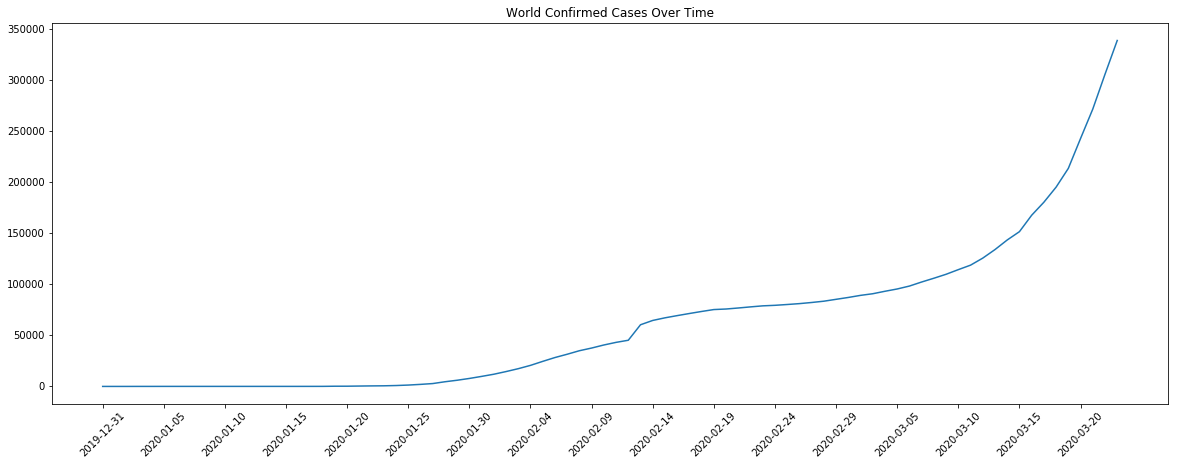

In [20]:
f = plt.figure(figsize=(20,7))
plt.plot(df.date, df.World)
ticks = [df.date[i] for i in range(0, len(df.date),5)]
plt.xticks(ticks)
plt.xticks(rotation=45)
plt.title('World Confirmed Cases Over Time')
f.show()

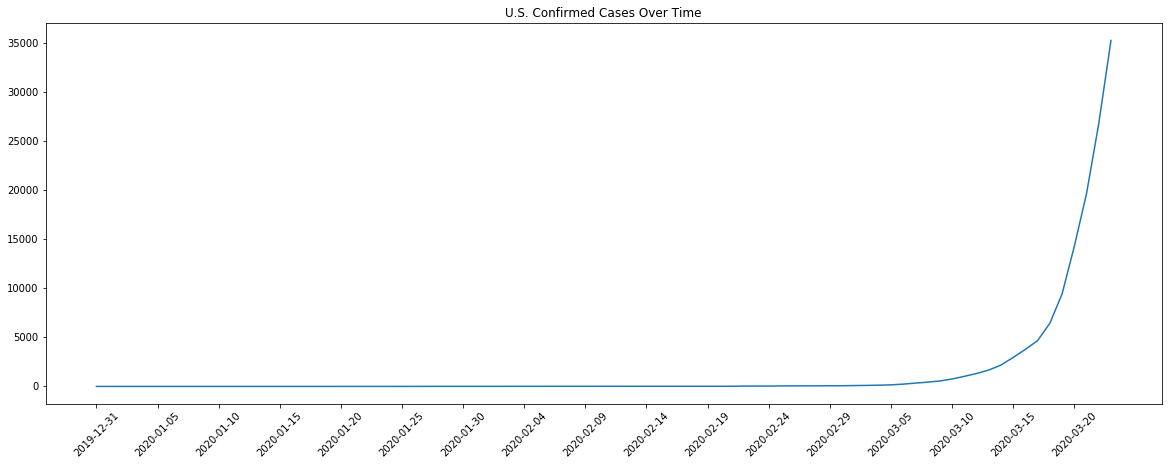

In [21]:
f = plt.figure(figsize=(20,7))
plt.plot(df.date, df['United States'])
ticks = [df.date[i] for i in range(0, len(df.date),5)]
plt.xticks(ticks)
plt.xticks(rotation=45)
plt.title('U.S. Confirmed Cases Over Time')
f.show()

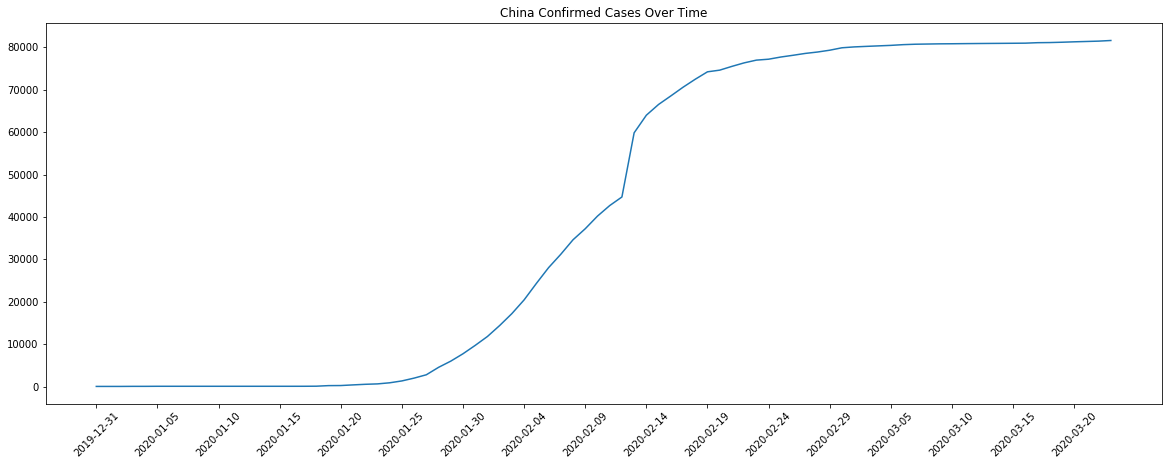

In [22]:
f = plt.figure(figsize=(20,7))
plt.plot(df.date, df.China)
ticks = [df.date[i] for i in range(0, len(df.date),5)]
plt.xticks(ticks)
plt.xticks(rotation=45)
plt.title('China Confirmed Cases Over Time')
f.show()

In [2]:
full_data = pd.read_csv('full_data.csv')

In [25]:
by_country = full_data[full_data.location != 'World']

In [26]:
from geopy.geocoders import Nominatim
import gmplot

geolocator = Nominatim()

# Go through all records and get lat long of city if exact coordinate not provided
coordinates = pd.DataFrame(columns=['country','latitude','longitude'])
i = 0
for country in by_country.location.unique():
        try:
            loc = geolocator.geocode(country)
            if not np.isnan(loc.latitude) and not np.isnan(loc.longitude):
                coordinates.loc[i] = [country, loc.latitude, loc.longitude]
                i = i+1
        except:
            continue
    
# Instantiate and center a GoogleMapPlotter object to show our map
gmap = gmplot.GoogleMapPlotter(30, 0, 3)

# Insert points on the map passing a list of latitudes and longitudes


/Users/kellysooch/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning:

Using Nominatim with the default "geopy/1.20.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.



In [48]:
df = by_country.merge(pd.DataFrame(coordinates), how='left', left_on='location', right_on='country')

In [49]:
df = df.drop('country',1)

In [50]:
df = df.dropna()

In [51]:
df.head()

,date,location,new_cases,new_deaths,total_cases,total_deaths,latitude,longitude
0,2019-12-31,Afghanistan,0,0,0,0,33.768006,66.238514
1,2020-01-01,Afghanistan,0,0,0,0,33.768006,66.238514
2,2020-01-02,Afghanistan,0,0,0,0,33.768006,66.238514
3,2020-01-03,Afghanistan,0,0,0,0,33.768006,66.238514
4,2020-01-04,Afghanistan,0,0,0,0,33.768006,66.238514


In [54]:
df = df.sort_values(by='date')

In [59]:
df = df[df.location != 'International']

In [94]:
import plotly.express as px
import plotly.graph_objects as go

date_range = df[(df.date <= '2020-03-31') & (df.date >= '2020-01-01')]
fig = px.scatter_geo(date_range, lat="latitude", lon='longitude', color="new_cases",
                     hover_name="location", size="new_cases",size_max=50,
                     animation_frame="date", center={'lat': 34, 'lon': 9},height=600)
fig.show()

In [3]:
world = full_data[full_data.location == 'World'].sort_values(by='date')
world.reset_index(inplace=True)

/Users/kellysooch/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


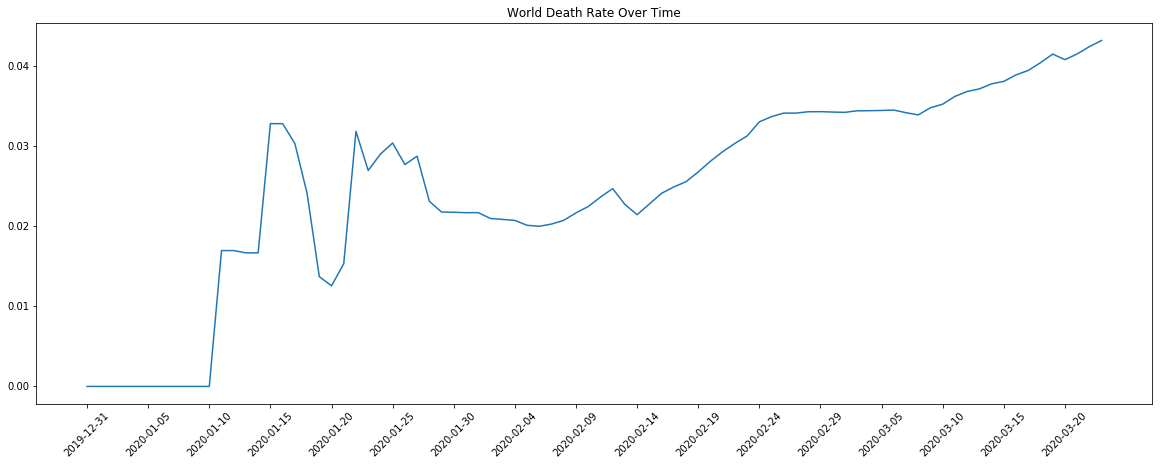

In [4]:
f = plt.figure(figsize=(20,7))
plt.plot(world.date, world.total_deaths/world.total_cases)
ticks = [world.date[i] for i in range(0, len(world.date),5)]
plt.xticks(ticks)
plt.xticks(rotation=45)
plt.title('World Death Rate Over Time')
f.show()

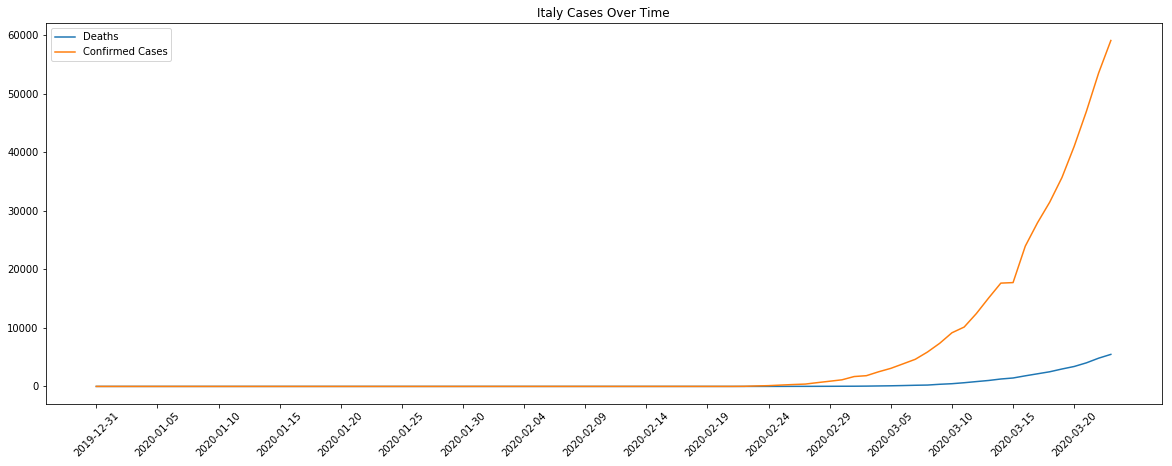

In [5]:
italy = full_data[full_data['location'] == 'Italy'].sort_values(by='date')
italy.reset_index(inplace=True)

f = plt.figure(figsize=(20,7))
plt.plot(italy.date, italy.total_deaths, italy.total_cases)
ticks = [italy.date[i] for i in range(0, len(italy.date),5)]
plt.xticks(ticks)
plt.xticks(rotation=45)
plt.title('Italy Cases Over Time')
plt.legend(['Deaths','Confirmed Cases'])
f.show()

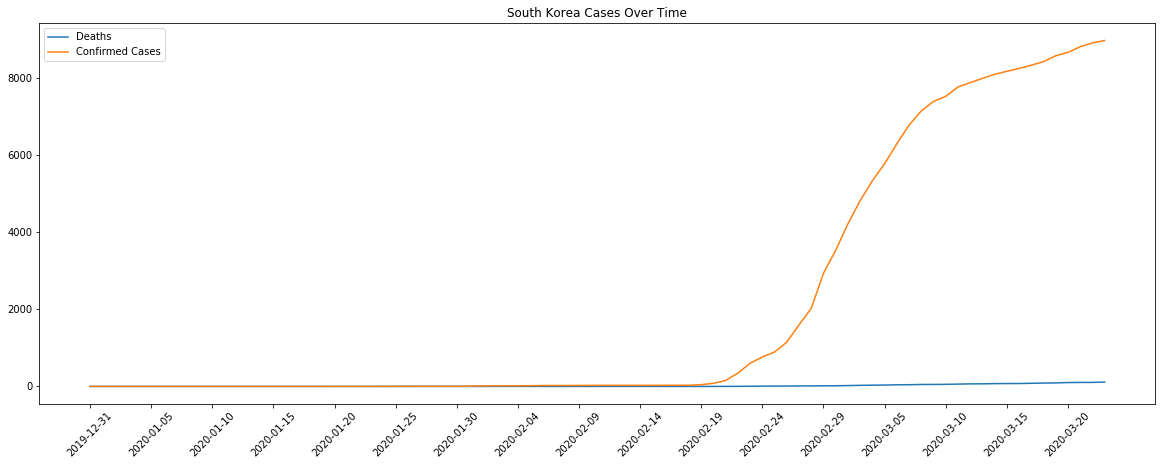

In [6]:
south_korea = full_data[full_data['location'] == 'South Korea'].sort_values(by='date')
south_korea.reset_index(inplace=True)

f = plt.figure(figsize=(20,7))
plt.plot(south_korea.date, south_korea.total_deaths, south_korea.total_cases)
ticks = [south_korea.date[i] for i in range(0, len(south_korea.date),5)]
plt.xticks(ticks)
plt.xticks(rotation=45)
plt.title('South Korea Cases Over Time')
plt.legend(['Deaths','Confirmed Cases'])
f.show()

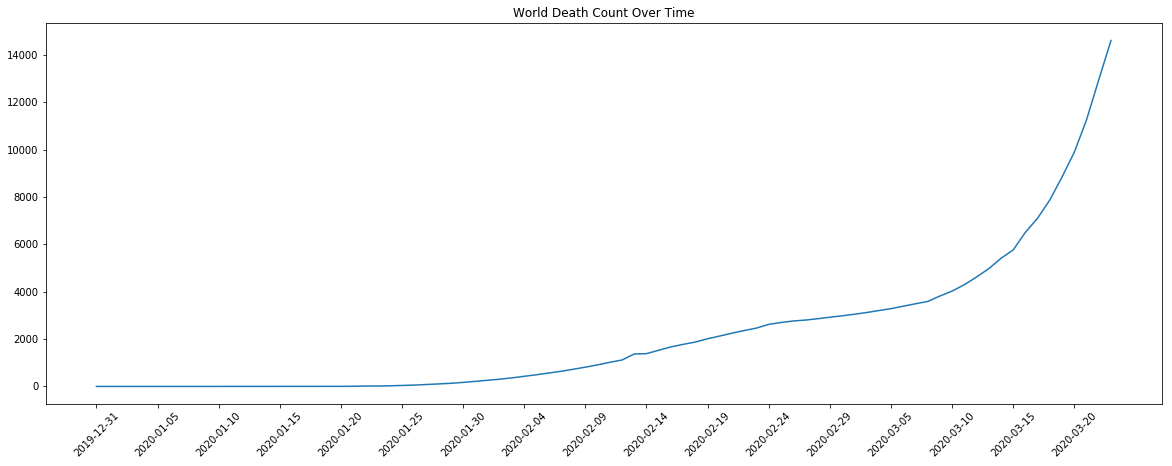

In [7]:
f = plt.figure(figsize=(20,7))
plt.plot(world.date, world.total_deaths)
ticks = [world.date[i] for i in range(0, len(world.date),5)]
plt.xticks(ticks)
plt.xticks(rotation=45)
plt.title('World Death Count Over Time')
f.show()